# Proyecto Final
## MAchine Learning
### Ricardo Chacon Brenes


En este proyecto de machine learning, construiremos un modelo desde cero para predecir el precio de casas en Sidney, Australia, utilizando algoritmos de Regresión Lineal, Ridge y Lasso con datos de 2000 a 2009.

### 1. Importar Datos

Datos recuperados de: https://www.kaggle.com/datasets/mihirhalai/sydney-house-prices

Columnas:

Date = Date Sold

Id = address

Suburb = Suburb Name

Postal Code

Sell Price(Target)

Bed = # Bedrooms

Bath = # Bathrooms

car = # car spaces

proptype = property type



In [1]:
# Importar Datos

import pandas as pd

file_path = r'C:\Users\chaconri\Desktop\Data Science TEC\SidneyHouses.csv'
Sydney_df = pd.read_csv(file_path)
Sydney_df.head()

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,6/19/2019,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,6/13/2019,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,6/7/2019,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,5/28/2019,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,5/22/2019,5,Whale Beach,2107,8000000,5.0,4,4.0,house


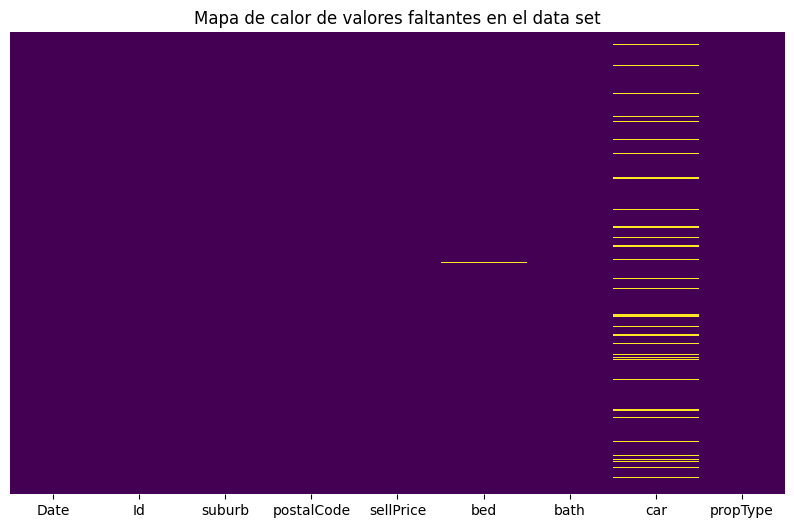

Date              0
Id                0
suburb            0
postalCode        0
sellPrice         0
bed             154
bath              0
car           18151
propType          0
dtype: int64


In [3]:
# Revisar si el data set tiene valores faltantes

import seaborn as sns
import matplotlib.pyplot as plt

# Contar valores faltantes por columnas
missing_values = Sydney_df.isnull().sum()

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(Sydney_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Mapa de calor de valores faltantes en el data set')
plt.show()

# Imprimir la cantidad de valores faltantes por columna
print(missing_values)

In [4]:
# Cambiar valores faltantes por el mean value

# Calcular el mean value de las columnas "bed" y "car"
bed_mean = Sydney_df['bed'].mean()
car_mean = Sydney_df['car'].mean()

# Reemplazar los valores faltantes en las columnas "bed" y "car" por el mean value
Sydney_df['bed'].fillna(bed_mean, inplace=True)
Sydney_df['car'].fillna(car_mean, inplace=True)

# Verificar que ya no hay valores faltantes
print(Sydney_df.isnull().sum())

Date          0
Id            0
suburb        0
postalCode    0
sellPrice     0
bed           0
bath          0
car           0
propType      0
dtype: int64


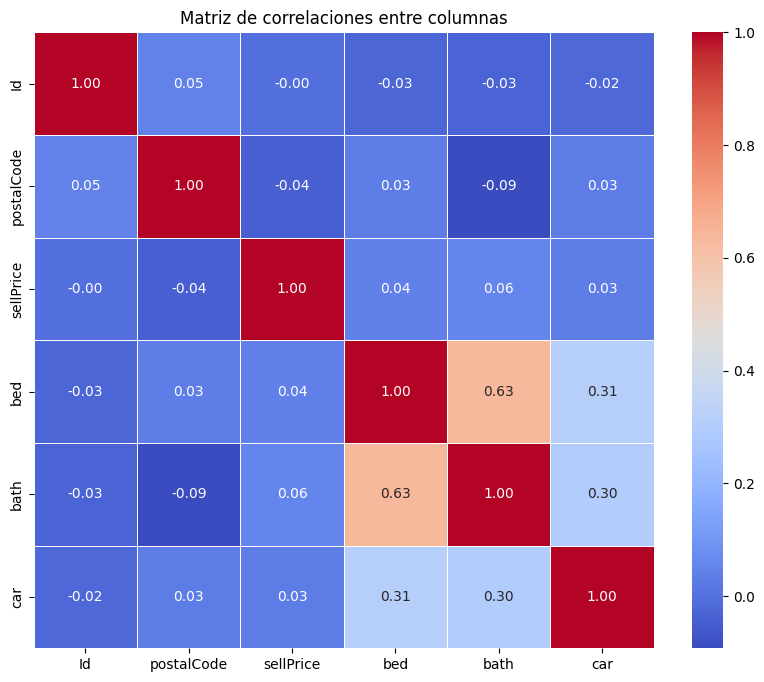

In [8]:
# Visualizar matriz de correlacion entre variables para entender el comportamiento y relaciones de los datos entre si



numeric_columns = Sydney_df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlaciones entre columnas')
plt.show()





In [16]:
# Droppear columna id ya que como se puede ver en la matriz de correlaciones no aportaria mucho en la contrucciones del modelo

column_name_to_remove = Sydney_df.columns[1]
Sydney_df.drop(Sydney_df.columns[1], axis=1, inplace=True)

Sydney_df.head()


,Date,postalCode,sellPrice,bed,bath,car,propType
0,6/19/2019,2107,1210000,4.0,2,2.0,house
1,6/13/2019,2107,2250000,4.0,3,4.0,house
2,6/7/2019,2107,2920000,3.0,3,2.0,house
3,5/28/2019,2107,1530000,3.0,1,2.0,house
4,5/22/2019,2107,8000000,5.0,4,4.0,house


In [18]:
#Describir Datos
Sydney_df.describe()

,postalCode,sellPrice,bed,bath,car
count,199504.000000,1.995040e+05,199504.000000,199504.000000,199504.000000
mean,2196.379155,1.269776e+06,3.516479,1.890669,1.936224
std,193.053467,6.948239e+06,1.066143,0.926001,1.010857
min,2000.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,2082.000000,7.200000e+05,3.000000,1.000000,1.000000
50%,2144.000000,9.850000e+05,3.000000,2.000000,2.000000
75%,2211.000000,1.475000e+06,4.000000,2.000000,2.000000
max,4878.000000,2.147484e+09,99.000000,99.000000,41.000000


In [19]:
Sydney_df.shape

(199504, 7)

In [22]:
# Codificar columna Date

Sydney_df['Date'] = pd.to_datetime(Sydney_df['Date'], format='%m/%d/%Y')
Sydney_df['Date_Encoded'] = Sydney_df['Date'].rank().astype(int)

Sydney_df.drop('Date', axis=1, inplace=True)

Sydney_df.head()


,postalCode,sellPrice,bed,bath,car,propType,Date_Encoded
0,2107,1210000,4.0,2,2.0,house,198667
1,2107,2250000,4.0,3,4.0,house,198295
2,2107,2920000,3.0,3,2.0,house,198063
3,2107,1530000,3.0,1,2.0,house,197482
4,2107,8000000,5.0,4,4.0,house,197157


In [23]:
# COntar variables en columna 'propType'

variable_count = Sydney_df['propType'].value_counts()

print(variable_count)

propType
house                   170117
townhouse                15177
duplex/semi-detached      6722
villa                     5701
terrace                   1344
other                      392
warehouse                   40
acreage                     11
Name: count, dtype: int64


In [28]:
# Codificar Columna 'propType'
from sklearn.preprocessing import LabelEncoder

#Instancia LabelEncoder
label_encoder = LabelEncoder()
Sydney_df['propType_Encoded'] = label_encoder.fit_transform(Sydney_df['propType'])

Sydney_df.drop('propType', axis=1, inplace=True)

# Muestra el resultado
Sydney_df.head()


,postalCode,sellPrice,bed,bath,car,Date_Encoded,propType_Encoded
0,2107,1210000,4.0,2,2.0,198667,2
1,2107,2250000,4.0,3,4.0,198295,2
2,2107,2920000,3.0,3,2.0,198063,2
3,2107,1530000,3.0,1,2.0,197482,2
4,2107,8000000,5.0,4,4.0,197157,2


In [31]:
#Normalizar los atributos

import pandas as pd
from sklearn.preprocessing import StandardScaler

columnas = Sydney_df.columns
scaler = StandardScaler()
Sydney_df = scaler.fit_transform(Sydney_df)


Sydney_df = pd.DataFrame(Sydney_df, columns=columnas)


Sydney_df



,postalCode,sellPrice,bed,bath,car,Date_Encoded,propType_Encoded
0,-0.462977,-0.008603,0.453525,0.118068,0.063091,1.717513,-0.309469
1,-0.462977,0.141075,0.453525,1.197984,2.041616,1.711054,-0.309469
2,-0.462977,0.237503,-0.484438,1.197984,0.063091,1.707026,-0.309469
3,-0.462977,0.037452,-0.484438,-0.961847,0.063091,1.696937,-0.309469
4,-0.462977,0.968625,1.391488,2.277900,2.041616,1.691294,-0.309469
...,...,...,...,...,...,...,...
199499,0.194873,0.090703,1.391488,1.197984,5.009404,-0.467154,-0.309469
199500,0.194873,-0.041705,0.453525,1.197984,0.063091,-0.495578,-0.309469
199501,0.194873,-0.060415,0.453525,0.118068,0.063091,-0.533483,-0.309469
199502,0.194873,-0.090638,-0.484438,0.118068,0.063091,-0.763272,2.545751


In [32]:
# Separracion del conjunto de datos en datos de entrenamiento y testeo
# Target Variable 'sellPrice'

import pandas as pd
from sklearn.model_selection import train_test_split

X = Sydney_df.drop('sellPrice', axis=1)  
y = Sydney_df['sellPrice']  

# División del conjunto de datos en entrenamiento (80%) y evaluación (20%)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Entrenamiento del Modelo Regresion Lineal

import torch
import torch.nn as nn
import torch.optim as optim



# Convertir los datos en tensores de PyTorch
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Definir el modelo de Regresión Lineal
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

# Definir hiperparámetros
input_dim = X_train_tensor.shape[1]
learning_rate = 0.001
num_epochs = 1000

# Inicializar el modelo
model = LinearRegressionModel(input_dim)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Entrenar el modelo
for epoch in range(num_epochs):
    # Calcular las predicciones del modelo
    y_pred = model(X_train_tensor)
    
    # Calcular la pérdida
    loss = criterion(y_pred, y_train_tensor)
    
    # Retropropagar y actualizar los pesos
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Obtener los parámetros finales del modelo
trained_weights = model.linear.weight.data
trained_bias = model.linear.bias.data

print('Entrenamiento del modelo de Regresión Lineal completado.')
print('Pesos (coeficientes):', trained_weights)
print('Bias (intercepto):', trained_bias)



Epoch [100/1000], Loss: 0.9077
Epoch [200/1000], Loss: 0.8076
Epoch [300/1000], Loss: 0.7441
Epoch [400/1000], Loss: 0.7029
Epoch [500/1000], Loss: 0.6755
Epoch [600/1000], Loss: 0.6570
Epoch [700/1000], Loss: 0.6444
Epoch [800/1000], Loss: 0.6357
Epoch [900/1000], Loss: 0.6297
Epoch [1000/1000], Loss: 0.6254
Entrenamiento del modelo de Regresión Lineal completado.
Pesos (coeficientes): tensor([[ 0.0136,  0.0198,  0.0275,  0.0631, -0.0189,  0.0359]])
Bias (intercepto): tensor([-0.0434])


In [35]:
# Evalucion del modelo Regresion Lineal

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Agregar una columna de unos a 'X_eval' para el término de sesgo (bias)
X_eval_with_bias = np.c_[np.ones((X_eval.shape[0], 1)), X_eval.values]

# Calcular las predicciones del modelo en el conjunto de evaluación
y_pred_eval = X_eval_with_bias.dot(np.append(trained_bias, trained_weights))

# Calcular el Error Medio Absoluto (MAE)
mae = mean_absolute_error(y_eval, y_pred_eval)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_eval, y_pred_eval)

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_eval, y_pred_eval)

print('Evaluación del modelo de Regresión Lineal:')
print('Error Medio Absoluto (MAE):', mae)
print('Error Cuadrático Medio (MSE):', mse)
print('Coeficiente de Determinación (R²):', r2)









Evaluación del modelo de Regresión Lineal:
Error Medio Absoluto (MAE): 0.07430488597391849
Error Cuadrático Medio (MSE): 2.5118547244330784
Coeficiente de Determinación (R²): 0.0019656472003451997


In [36]:
# Entremamiento del Modelo Regresion lasso

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



#  pipeline para estandarizar los datos y aplicar la Regresión Lasso
lasso_model = Pipeline([
    ('scaler', StandardScaler()), 
    ('lasso', Lasso(alpha=1.0))   
])

# Entrenar el modelo de Regresión Lasso
lasso_model.fit(X_train, y_train)

# Obtener los coeficientes y el intercepto del modelo
trained_coefficients = lasso_model.named_steps['lasso'].coef_
trained_intercept = lasso_model.named_steps['lasso'].intercept_

print('Entrenamiento del modelo de Regresión Lasso completado.')
print('Coeficientes:', trained_coefficients)
print('Intercepto:', trained_intercept)


Entrenamiento del modelo de Regresión Lasso completado.
Coeficientes: [-0.  0.  0.  0.  0. -0.]
Intercepto: -0.0017193065651456346


In [39]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Obtener las predicciones del modelo en el conjunto de evaluación
y_pred_eval = lasso_model.predict(X_eval)

# Calcular el Error Medio Absoluto (MAE)
mae = mean_absolute_error(y_eval, y_pred_eval)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_eval, y_pred_eval)

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_eval, y_pred_eval)

print('Evaluación del modelo de Regresión Lasso:')
print('Error Medio Absoluto (MAE):', mae)
print('Error Cuadrático Medio (MSE):', mse)
print('Coeficiente de Determinación (R²):', r2)


Evaluación del modelo de Regresión Lasso:
Error Medio Absoluto (MAE): 0.09411046312330126
Error Cuadrático Medio (MSE): 2.516875768616452
Coeficiente de Determinación (R²): -2.9362516254849425e-05


In [41]:
# Entrenamieno de Regresion Ridge

from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


alphas = [0.01, 0.1, 1.0, 10.0]

# pipeline para estandarizar los datos y aplicar la Regresión Ridge
ridge_model = Pipeline([
    ('scaler', StandardScaler()),   
    ('ridge', RidgeCV(alphas=alphas))  
])

# Entrenar el modelo de Regresión Ridge y seleccionar el mejor 'alpha'
ridge_model.fit(X_train, y_train)

# Obtener el mejor valor de 'alpha' seleccionado por validación cruzada
best_alpha = ridge_model.named_steps['ridge'].alpha_

print('El mejor valor de alpha seleccionado por validación cruzada:', best_alpha)

# Obtener los coeficientes y el intercepto del modelo con el mejor 'alpha'
trained_coefficients = ridge_model.named_steps['ridge'].coef_
trained_intercept = ridge_model.named_steps['ridge'].intercept_

print('Entrenamiento del modelo de Regresión Ridge completado.')
print('Coeficientes:', trained_coefficients)
print('Intercepto:', trained_intercept)



El mejor valor de alpha seleccionado por validación cruzada: 10.0
Entrenamiento del modelo de Regresión Ridge completado.
Coeficientes: [-0.04457188  0.00937435  0.04258038  0.01053938  0.02432922 -0.00855608]
Intercepto: -0.0017193065651456352


In [42]:
# Evaluacion Modelo Ridge

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Obtener las predicciones del modelo en el conjunto de evaluación
y_pred_eval = ridge_model.predict(X_eval)

# Calcular el Error Medio Absoluto (MAE)
mae = mean_absolute_error(y_eval, y_pred_eval)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_eval, y_pred_eval)

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_eval, y_pred_eval)

print('Evaluación del modelo de Regresión Ridge:')
print('Error Medio Absoluto (MAE):', mae)
print('Error Cuadrático Medio (MSE):', mse)
print('Coeficiente de Determinación (R²):', r2)


Evaluación del modelo de Regresión Ridge:
Error Medio Absoluto (MAE): 0.07433695854440306
Error Cuadrático Medio (MSE): 2.5118610842181304
Coeficiente de Determinación (R²): 0.0019631202691908767
